In [37]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [38]:
data = pd.read_csv("2022-09-26-results.csv")
data.head(2)
x = data["eps"].apply(lambda s: float(s)/100)
y_model = data["kappa_eff [S/m]"]
y_bruggeman = 0.1 * x ** 1.5

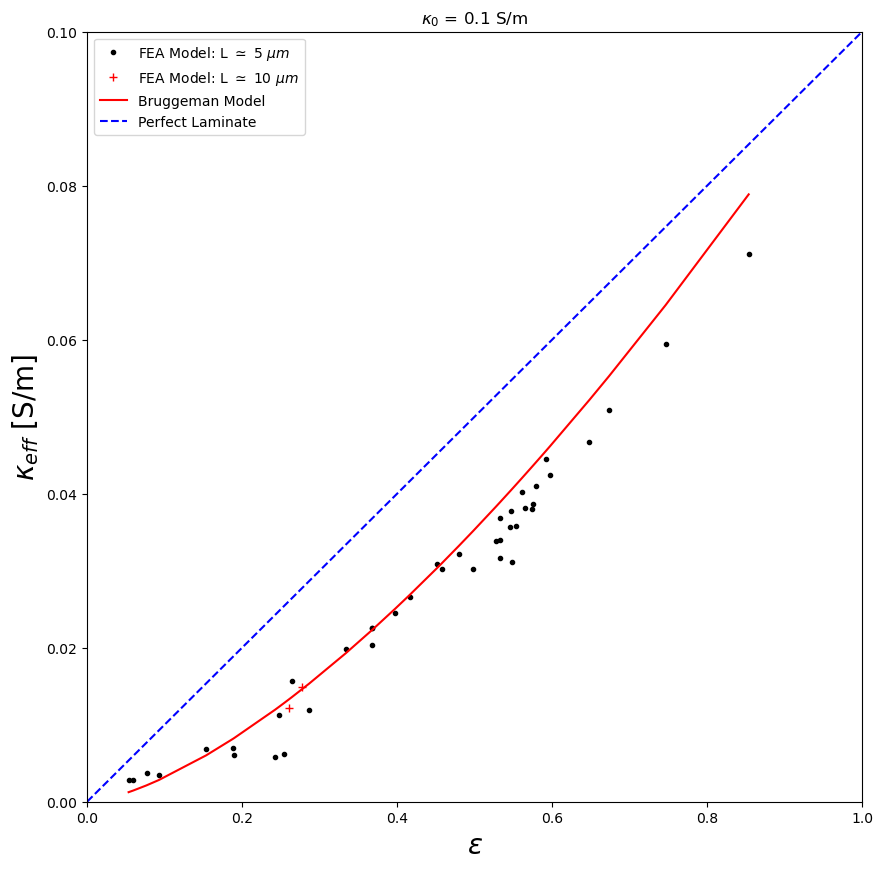

In [39]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(x, y_model, '.k', label='FEA Model: L $\mathrm{\simeq}$ 5 $\mu m$')
ax.plot([0.2608, 0.2768], [1.2130e-2, 1.4942e-2], '+k', label='FEA Model: L $\mathrm{\simeq}$ 10 $\mu m$')
ax.plot(x, y_bruggeman, 'r', label='Bruggeman Model')
ax.plot([0, 1], [0, 0.1], '--b', label='Perfect Laminate')
ax.set_xlabel(r"$\varepsilon$", fontsize=20)
ax.set_ylabel(r"$\kappa_{eff}$ [S/m]", fontsize=20)
ax.set_title(r"$\kappa_0$ = 0.1 S/m")
ax.set_xlim([0, 1])
ax.set_ylim([0, 0.1])
ax.legend()
plt.savefig("2022-09-26-effective-conductivity.png", dpi=500)
plt.show()